<a href="https://colab.research.google.com/github/sattwiksuman/Python_Codes/blob/master/InterviewQuestions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<i>Questions are taken from https://www.youtube.com/playlist?list=PLFV6T8f5WU2FRO_Hu7q9b18yB1P98NSZd<i>

## Question 1: find common letters in strings

In [ ]:
arr1 = 'NAINA'
arr2= 'NEENA'

In [ ]:
def common(arr1, arr2):
    common = []
    for l in set(arr1):
        for ll in set(arr2):
            if l==ll:
                common.append(l)
    return common
print(common(arr1, arr2))

['A', 'N']


## Question 2: count frequency of words in a string

In [ ]:
inp = 'Sheena loves eating apple and mangoes. My sister also loves eating Apples and Mangoes.'

In [ ]:
def freq_words(inp):
    words = inp.split()
    words = [w.lower() for w in words]
    freq = {}
    for word in words:
        #handle full stops:
        if word[-1]=='.':
            word = word[:-1]
        #count frequencies and store in dictionary
        if word not in freq.keys():
            freq[word]=1
        else:
            freq[word] +=1
    return freq

print(freq_words(inp))

{'sheena': 1, 'loves': 2, 'eating': 2, 'apple': 1, 'and': 2, 'mangoes': 2, 'my': 1, 'sister': 1, 'also': 1, 'apples': 1}


In [ ]:
freq_words(inp).values()

dict_values([1, 2, 2, 1, 2, 2, 1, 1, 1, 1])

## Question 3: convert two lists into a dictionary mapping one list to another

In [ ]:
l1 = ['Naina', 'Kimi', 'Sheena']
l2 = [85324, 33568, 87624]

In [ ]:
def dicty(l1, l2):
    dicty={}
    for i, item in enumerate(l1):
        dicty[item] = l2[i]
    return(dicty)

print(dicty(l1, l2))

{'Naina': 85324, 'Kimi': 33568, 'Sheena': 87624}


## Question 4: find the missing number in a sequence

In [ ]:
seq = [3, 5, 7, 9, 11]    
#if its a simple sequence we can use (n*(n+1)/2)-(sum of sequence)
#but here we assume a general arithmetic sequence

In [ ]:
def missing(seq):
    #find gap:
    gap = {}
    track = {}
    br = 0
    for i, item in enumerate(seq[1:]):
        c = item - seq[i]
        track[item] = c
        if c not in gap.keys():
            gap[c] = 1
        else:
            gap[c] += 1
        if len(gap.keys())==2:
            for key, num in zip(gap.keys(), gap.values()):
                if num>1:
                    norm_gap=key
                    br = 1
        if br==1:
            break
    if len(gap.keys())==2:    
        for item in track.keys():
            if track[item]!=norm_gap:
                missing_item = item - norm_gap
                for i in range(len(seq)):
                    if seq[i] == item:
                        pos = i+1
                        break
                found =1
            if found ==1: break
        return missing_item, pos
    else:
        print('No missing digit is found')
        return None, None
        

missing_item, pos = missing(seq)

print(f'RESULT: \nmissing item is {missing_item} in position {pos}')

No missing digit is found
RESULT: 
missing item is None in position None


## Question 5: Find pairs with given sum

In [ ]:
#arr = [5 ,7, 4, 3, 9, 8, 19, 21]
#sum = 17

In [ ]:
%%time
arr = [5 ,7, 4, 3, 9, 8, 19, 21, 10]
sum = 17
def find_pair(arr, sum):
    pair=[]
    cnt = 0
    for i, item1 in enumerate(arr):
        for item2 in arr[i+1:]:
            cnt +=1
            if item1+item2==sum:
                pair.append([item1, item2])
                break
    return pair, cnt

pairs, cnt = find_pair(arr, sum)
print(f'pairs found = {pairs}')
print(f'no. of steps = {cnt}')

pairs found = [[7, 10], [9, 8]]
no. of steps = 33
CPU times: user 292 µs, sys: 0 ns, total: 292 µs
Wall time: 259 µs


### Better solution available online uses a different algo:
Pseudo_code:
1. sort array
2. left ==arr[0] and right ==arr[-1]
3. current_sum= left+right:
4. if current_sum > sum: right=arr[-2]
5. if current_sum < sum: left=arr[1]
6. continue till left + right == sum

The below code is written such that multiple pairs can also be found

In [ ]:
%%time
arr = [5 ,7, 4, 3, 9, 8, 19, 21, 10]
sum = 17
def find_pair_fast(arr, sum):
    arr.sort()
    li=0
    ri=-1
    print(abs(ri))
    left = arr[li]
    right = arr[ri]
    current_sum = left + right
    cnt=0
    pairs =[]
    while abs(li)+abs(ri)<len(arr):
        if current_sum>sum:
            ri = ri-1
            right = arr[ri]
            current_sum = left + right
            cnt+=1
        elif current_sum<sum:
            li = li+1
            left = arr[li]
            current_sum = left + right
            cnt+=1
        elif current_sum == sum:
            pairs.append([left, right])
            li = li+1
            left = arr[li]
            current_sum = left + right
            cnt+=1
    return pairs, cnt

pairss, cntss = find_pair_fast(arr, sum)
print(f'pairs found = {pairss}')
print(f'no. of steps = {cntss}')

1
pairs found = [[7, 10], [8, 9]]
no. of steps = 8
CPU times: user 1.06 ms, sys: 0 ns, total: 1.06 ms
Wall time: 1.07 ms


## Question 6: Find the depth of a tree

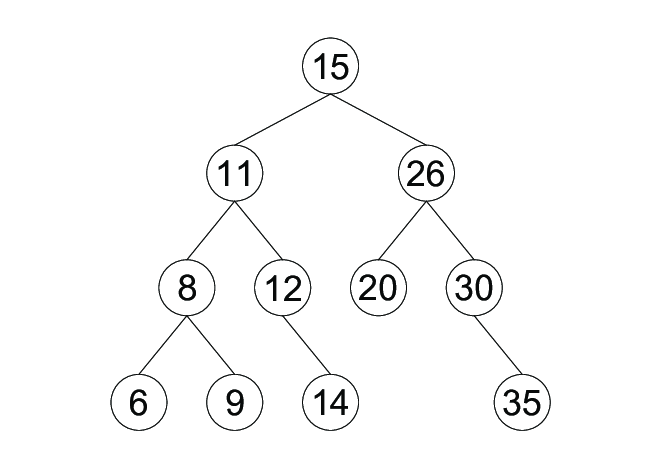

In [ ]:
!pip install pptree

  Created wheel for pptree: filename=pptree-3.1-py3-none-any.whl size=4628 sha256=02f70b5241c96df9089a332631a4d22ed14179398c6fee59a23e7e4746446e4e
  Stored in directory: /root/.cache/pip/wheels/9e/e8/7d/a9c3c19b4722608a0d8b05a38c36bc3f230c43becd2a46794b
Successfully built pptree


In [ ]:
class Node:
    def __init__(self, key):
        self.data = key
        self.left = None
        self.right = None

def depth(root):
    if root == None:
        return 0
    else:
        print(f'now at node {root.data}')
        ldep = 1
        rdep = 1
        cnt=0
        ldep += depth(root.left)
        rdep += depth(root.right)
        '''
        if root.left == root.right == None:
            return 1
        elif root.left!=None and root.right!=None:
            ldep += depth(root.left)
            rdep += depth(root.right)
        elif root.left!=None and root.right==None:
            ldep += depth(root.left)
        elif root.left==None and root.right!=None:
            rdep += depth(root.right)
        '''
        if ldep>=rdep:
            return ldep
        if ldep<rdep:
            return rdep

root = Node(15)
root.left = Node(11)
root.right = Node(26)
root.left.left = Node(8)
root.left.right = Node(12)
root.right.left = Node(20)
root.right.right = Node(30)
root.left.left.left = Node(6)
root.left.left.right = Node(9)
root.left.right.right = Node(14)
root.right.right.right = Node(35)

dep = depth(root)

print(f'depth of tree = {dep}') 

from ppbtree import *
print_tree(root, nameattr='data')

now at node 15
now at node 11
now at node 8
now at node 6
now at node 9
now at node 12
now at node 14
now at node 26
now at node 20
now at node 30
now at node 35
depth of tree = 4
        ┌6
      ┌8┤
      | └9
   ┌11┤
   |  └12┐
   |     └14
 15┤
   |  ┌20
   └26┤
      └30┐
         └35


In [ ]:
#traverse through tree:
def traverse_tree(root: Node):
    if root:
        print(root.data)
        tree = []
        tree.append(root.data)
        if root.left:
            try:
                tree = tree + traverse_tree(root.left)
            except: tree =  tree
        if root.right:
            try:
                tree = tree + traverse_tree(root.right)
            except: tree = tree

traverse_tree(root)        

15
11
8
6
9
12
14
26
20
30
35


## Question 7: Postfix expression using stack
From a given array['2', '1', '+', '3', '*'] if operand is encountered push into stack and if operator is encountered pop top two elements in the stack, use the operator and then push the result into the stack. print the result.

In [ ]:
arr = ['2', '1', '+', '3', '*']

def postfix(arr):
    stack =[]
    operators = ['+', '-', '*', '/']
    for item in arr:
        if item not in operators:
            stack.append(item)
        elif item in operators:
            x=stack.pop()
            y=stack.pop()
            ans = eval(x+item+y)
            stack.append(str(ans))
        print(item, '--->', stack)
    if arr[-1] in operators:
        return stack
    else: 
        print('last element of given array must be operator to generate a valid solution')
        return None

print(F'answer = {postfix(arr).pop()}')
            

2 ---> ['2']
1 ---> ['2', '1']
+ ---> ['3']
3 ---> ['3', '3']
* ---> ['9']
answer = 9


## Question 8: length of last word in a sentence

In [2]:
sentence = 'Hello NetsetOS'
def len_last_word(sentence):
    words = sentence.split()
    return len(words[-1])

print(f'length of last word = {len_last_word(sentence)}')

length of last word = 8


## Question 9: remove duplicates from sorted array

In [3]:
arr = [1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5]

def remove_duplicates(arr):
    arr.sort()
    arr_set = set(arr)
    no_dup = []
    for item in arr_set:
        no_dup.append(item)
    return no_dup

print(f'array witout duplicates in {remove_duplicates(arr)}')

array witout duplicates in [1, 2, 3, 4, 5]


## Question 10: find maximum sum subarray (Kadane's Algorithm)

In [4]:
arr =[4, -3, -2, 2, 3, 1, -2, -3, 6, -6, -4, 2, 1]

def max_sum_subarray(arr):
    curr_sum = 0
    max_sum = 0
    for item in arr:
        curr_sum = curr_sum + item
        if curr_sum > max_sum:
            max_sum = curr_sum
        if curr_sum < 0:
            curr_sum = 0
    return max_sum

print(f'maximum sum of sub array = {max_sum_subarray(arr)}')

maximum sum of sub array = 7


## Question 11: Find index of groups of strings that are anagrams

In [36]:
arr = ['cat', 'dog', 'god', 'tca', 'act']

def anagram_index(arr):
    anagram = {}
    for i, item in enumerate(arr):
        an = ''
        for c in sorted(item):
            an = an + c
        print(item, an)
        if an not in anagram.keys():
            anagram[an] = []
            anagram[an].append(i)
        elif an in anagram.keys():
            anagram[an].append(i)
    return anagram

print(f'index of anagrams = {anagram_index(arr)}')        
        

cat act
dog dgo
god dgo
tca act
act act
index of anagrams = {'act': [0, 3, 4], 'dgo': [1, 2]}


## Question 12: First non repeating character in a string

In [44]:
string = 'NETSETOSNETM'

def first_non_repeat(string):
    chars = {}
    for i, char1 in enumerate(string):
        if char1 not in chars.keys():
            chars[char1]=1
            for char2 in string[i+1:]:
                if char1 == char2:
                    chars[char1] +=1
    print(chars)
    for key, value in zip(chars.keys(), chars.values()):
        if value==1:
            return key
            break

print(f'first non repeating character = {first_non_repeat(string)}')

{'N': 2, 'E': 3, 'T': 3, 'S': 2, 'O': 1, 'M': 1}
first non repeating character = O


## Question 13: Reverse words in a sentence

In [47]:
sentence = 'NetsetOS is an online platform'

def rev_sentence(sentence):
    sentence = sentence.split()
    reverse_sentence =''
    for word in sentence[-1::-1]:
        reverse_sentence = reverse_sentence + word + ' '
    return reverse_sentence

print(f'The sentence printed in reverse is "{rev_sentence(sentence)}"') 

The sentence printed in reverse is "platform online an is NetsetOS "
